In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /content/cats_and_dogs_filtered.zip

--2021-05-18 05:07:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.192.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  68.8MB/s    in 1.0s    

2021-05-18 05:07:55 (68.8 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
DATADIR = '/content/cats_and_dogs_filtered/train'
CATEGORIES = ['cats','dogs']
IMG_SIZE =100

In [ ]:
training_data=[]

def create_training_data():

    for category in CATEGORIES:

        path=os.path.join(DATADIR, category)

        class_num=CATEGORIES.index(category)

        for img in os.listdir(path):

            try:

                img_array=cv2.imread(os.path.join(path,img))

                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

                training_data.append([new_array,class_num])

            except Exception as e:

                pass

create_training_data()

In [ ]:
print(len(training_data))

2000


In [ ]:
lenofimage = len(training_data)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [ ]:
X.shape

(2000, 30000)

In [ ]:
X = X/255.0

In [ ]:
X[1]

array([0.40392157, 0.47843137, 0.52941176, ..., 0.45882353, 0.56470588,
       0.61960784])

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(2000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
import time
start = time.time()
svc.fit(X_train, y_train)

end = time.time()
print("time taken to create model",end-start)

time taken to create model 119.65154910087585


In [ ]:
y2 = svc.predict(X_test)

In [ ]:
train_acc = svc.score( X_train, y_train )

In [ ]:
print("training accuracy", train_acc * 100)

training accuracy 100.0


In [ ]:
from sklearn.metrics import accuracy_score
cf= accuracy_score(y_test,y2)*100
print("Accuracy on testing data is",cf)

Accuracy on testing data is 55.2


In [ ]:
from sklearn.metrics import confusion_matrix

cf_m = confusion_matrix(y_test,y2)

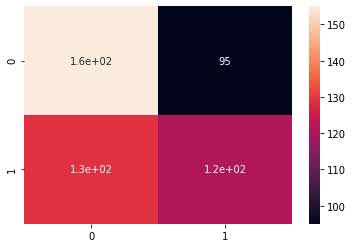

In [ ]:
import seaborn as sns

sns.heatmap(cf_m,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58       250
           1       0.56      0.48      0.52       250

    accuracy                           0.55       500
   macro avg       0.55      0.55      0.55       500
weighted avg       0.55      0.55      0.55       500



In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
495,1,1
496,0,1
497,0,0
498,1,1
